(0.0, 82.0, 0.0, 1.5)

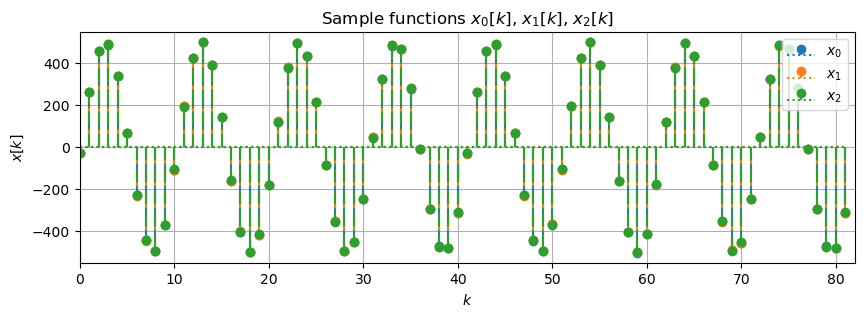

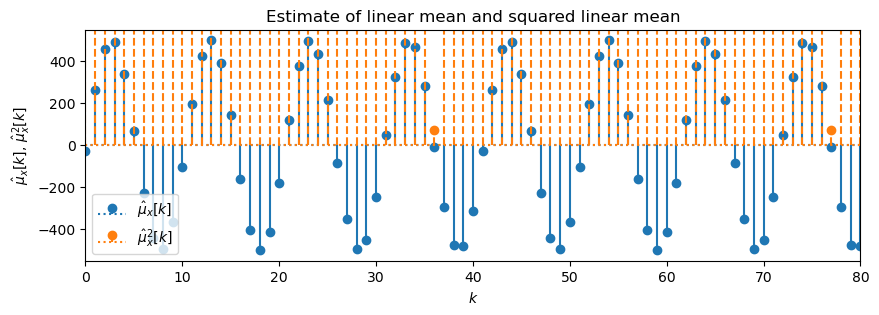

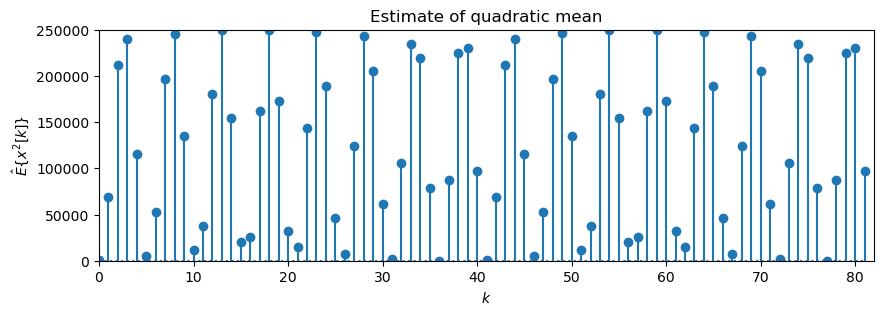

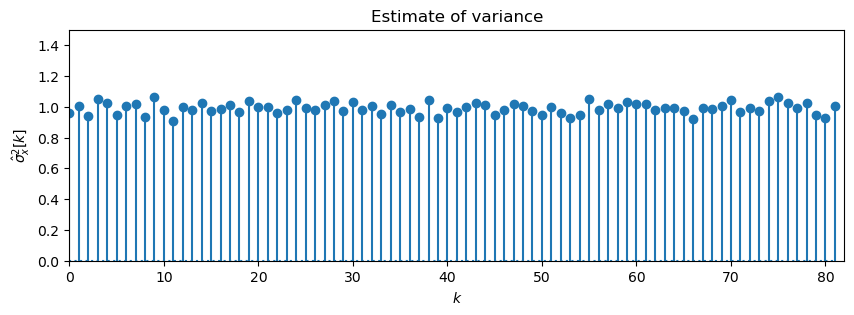

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def generate_wn(size):
    wn = np.random.normal(0, 1, size)
    wn = np.clip(wn, 0, 1)  # Ograniczenie do przedziału [0, 1]
    return wn

f = 500
A = 500.25
B = 499.75
K = 82  # number of random samples
Kp = 80
N = 1800  # number of sample functions


# generate the sample functions
Wn = generate_wn(K)
np.random.seed(3)
x = np.random.normal(size=(N, K))
Wn = np.random.normal(0, 1)
x += np.tile(A * np.cos(2 * f * np.pi / K * np.arange(K) + B * Wn), [N, 1])
# estimate the linear mean as ensemble average
mu = 1 / N * np.sum(x, 0)
# estimate the quadratic mean
qu = 1 / N * np.sum(x**2, 0)
# estimate the variance
sigma = 1 / N * np.sum((x - mu) ** 2, 0)


# plot results
plt.rc("figure", figsize=(10, 3))

plt.figure()
plt.stem(x[0, :], basefmt="C0:", linefmt="C0-", markerfmt="C0o", label=r"$x_0$")
plt.stem(x[1, :], basefmt="C1:", linefmt="C1--", markerfmt="C1o", label=r"$x_1$")
plt.stem(x[2, :], basefmt="C2:", linefmt="C2-.", markerfmt="C2o", label=r"$x_2$")
plt.title(r"Sample functions $x_0[k]$, $x_1[k]$, $x_2[k]$")
plt.xlabel(r"$k$")
plt.ylabel(r"$x[k]$")
plt.axis([0, K, -f-50, f+50])
plt.legend()
plt.grid(True)

plt.figure()
plt.stem(mu, basefmt="C0:", linefmt="C0-", markerfmt="C0o", label=r"$\hat{\mu}_x[k]$")
plt.stem(
    mu**2, basefmt="C1:", linefmt="C1--", markerfmt="C1o", label=r"$\hat{\mu}^2_x[k]$"
)
plt.title(r"Estimate of linear mean and squared linear mean")
plt.xlabel(r"$k$")
plt.ylabel(r"$\hat{\mu}_x[k]$, $\hat{\mu}^2_x[k]$")
plt.axis([0, Kp, -f-50, f+50])
plt.legend()

plt.figure()
plt.stem(qu, basefmt="C0:")
plt.title(r"Estimate of quadratic mean")
plt.xlabel(r"$k$")
plt.ylabel(r"$\hat{E}\{x^2[k]\}$")
plt.axis([0, K, 0, f*f])

plt.figure()
plt.stem(sigma, basefmt="C0:")
plt.title(r"Estimate of variance")
plt.xlabel(r"$k$")
plt.ylabel(r"$\hat{\sigma}^2_x[k]$")
plt.axis([0, K, 0, 1.5])



(0.0, 64.0, 0.0, 64.0)

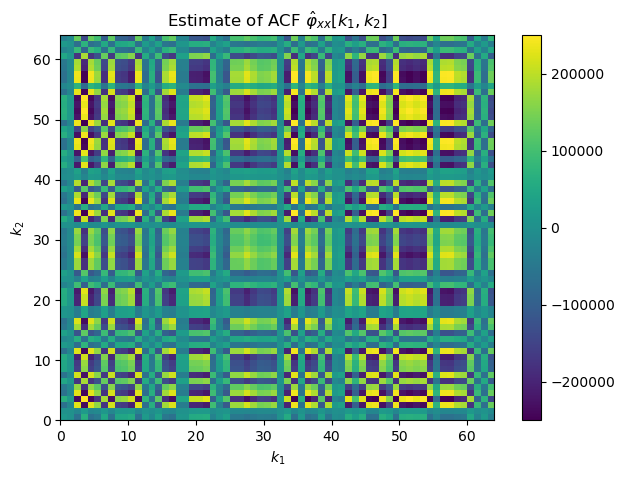

In [4]:
L = 64  # number of random samples
N = 1800  # number of sample functions

# generate sample functions
np.random.seed(1)
r = np.random.normal(size=(N, L))
h = np.random.normal(size=(N, 10))
Wn = np.random.normal(size=(L,))
x = np.asarray(
    [np.convolve(r[n, :], h[n, :], mode="same") for n in range(N)]
) + np.tile(A * np.cos(2 * f * np.pi / L * np.arange(L) + B * Wn), [N, 1])

# estimate the auto-correlation function (ACF)
acf = np.zeros((L, L))
for n in range(L):
    for m in range(L):
        # x[0, n] * x[0, m] is the product of the 0-th sample function at two different time-steps n,m
        # the individual products are then summed up for all N sample functions
        acf[n, m] = 1 / N * np.sum(x[:, n] * x[:, m], axis=0)


# plot ACF
plt.figure(figsize=(7, 5))
plt.pcolormesh(np.arange(L + 1), np.arange(L + 1), acf)
plt.title(r"Estimate of ACF $\hat{\varphi}_{xx}[k_1, k_2]$")
plt.xlabel(r"$k_1$")
plt.ylabel(r"$k_2$")
plt.colorbar()
plt.axis("tight")

